In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [7]:
df = pd.read_csv('/content/drive/MyDrive/data/RealWorld_ATC_Decision_Dataset_Enhanced2.csv', engine='python')


In [8]:
df1 = df.copy()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Flight_ID                       250000 non-null  int64  
 1   Current_Altitude_ft             250000 non-null  int64  
 2   Current_Speed_knots             250000 non-null  int64  
 3   Heading_degrees                 250000 non-null  int64  
 4   Vertical_Speed_ft_per_min       250000 non-null  int64  
 5   Fuel_Remaining_kg               250000 non-null  float64
 6   MST_minutes                     250000 non-null  float64
 7   Wind_Speed_knots                250000 non-null  float64
 8   Wind_Direction_degrees          250000 non-null  int64  
 9   Visibility_meters               250000 non-null  int64  
 10  Precipitation_mm                250000 non-null  float64
 11  Temperature_C                   250000 non-null  float64
 12  Runway_Condition

In [10]:
df1.describe()
# summary.to_csv('describe_summary.csv', index = True)
# files.download('describe_summary.csv')

,Flight_ID,Current_Altitude_ft,Current_Speed_knots,Heading_degrees,Vertical_Speed_ft_per_min,Fuel_Remaining_kg,MST_minutes,Wind_Speed_knots,Wind_Direction_degrees,Visibility_meters,Precipitation_mm,Temperature_C,Aircraft_in_Holding,ATC_Workload,Available_Parking_Spots,Parking_Occupancy_Time_minutes,Taxiing_Rate_knots,Arrival_Time_Diff_minutes,Distance_to_Destination_nm,Delay_Cost
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000
mean,125000.500000,20039.797372,349.285944,180.009968,0.63970,4748.497041,5.509886,32.480679,180.038920,5496.177104,25.013418,10.004753,6.587596,12.010256,19.397172,62.442832,17.505727,44.876492,3001.115078,2487.81387
std,72168.927986,11545.463229,144.344592,104.302034,1153.98841,2465.652327,2.598267,10.260828,104.247897,2608.027718,14.603157,17.350088,5.114659,4.545617,13.954379,33.439174,7.219941,43.582211,1158.072859,1381.34309
min,1.000000,0.000000,100.000000,0.000000,-2000.00000,500.000000,1.000000,7.550000,0.000000,500.000000,0.000000,-20.000000,0.000000,5.000000,0.000000,5.000000,5.000000,-30.000000,701.440000,0.00000
25%,62500.750000,10034.000000,224.000000,90.000000,-998.00000,2621.908092,3.260000,23.740000,90.000000,3244.000000,12.450000,-5.020000,3.000000,8.000000,7.000000,33.000000,11.250000,7.000000,2001.767500,1300.00000
50%,125000.500000,20085.500000,349.000000,180.000000,2.00000,4744.276717,5.520000,32.520000,180.000000,5501.000000,25.020000,10.000000,6.000000,11.000000,19.000000,62.000000,17.520000,45.000000,3004.050000,2370.00000
75%,187500.250000,30025.000000,474.000000,270.000000,999.00000,6872.920296,7.760000,41.260000,271.000000,7758.000000,37.560000,25.060000,9.000000,16.000000,29.000000,91.000000,23.760000,83.000000,4001.590000,3680.00000
max,250000.000000,39999.000000,599.000000,360.000000,1999.00000,9493.731160,10.000000,50.000000,360.000000,10000.000000,50.000000,40.000000,20.000000,20.000000,50.000000,120.000000,30.000000,120.000000,5000.000000,5000.00000


In [11]:
df1.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [12]:
df1.columns

Index(['Flight_ID', 'Current_Altitude_ft', 'Current_Speed_knots',
       'Heading_degrees', 'Vertical_Speed_ft_per_min', 'Fuel_Remaining_kg',
       'MST_minutes', 'Wind_Speed_knots', 'Wind_Direction_degrees',
       'Visibility_meters', 'Precipitation_mm', 'Temperature_C',
       'Runway_Conditions', 'Runway_Availability', 'Aircraft_in_Holding',
       'ATC_Workload', 'Time_of_Day', 'Available_Parking_Spots',
       'Parking_Occupancy_Time_minutes', 'Taxiing_Rate_knots',
       'Out_of_Gate_Time', 'Arrival_Time_Diff_minutes',
       'Distance_to_Destination_nm', 'Aircraft_Type_Model',
       'Flight_Route_Complexity', 'Political_Importance', 'Diverted_Before',
       'Transit_Flight', 'ATC_Instruction', 'Delay_Cost'],
      dtype='object')

In [13]:
target = df1['ATC_Instruction']
features = df1.drop(columns = {'ATC_Instruction', 'Flight_ID'})
target

,ATC_Instruction
0,Divert
1,Divert
2,Divert
3,Divert
4,Divert
...,...
249995,Land
249996,Divert
249997,Divert
249998,Divert


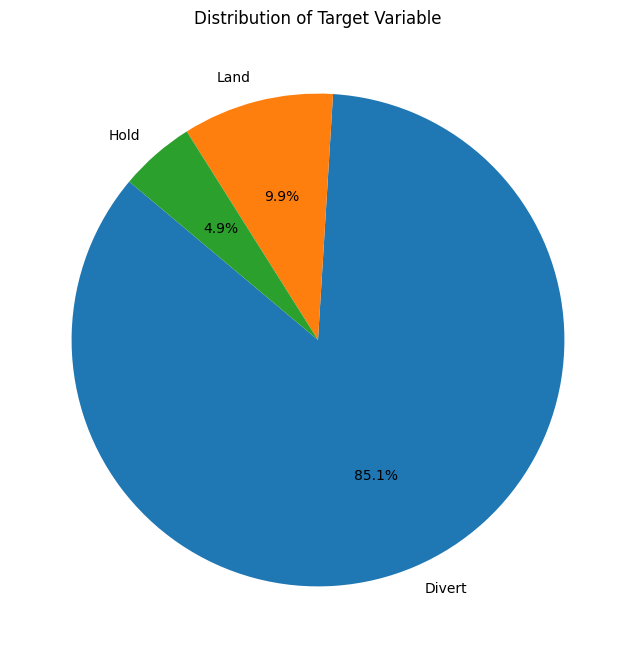

In [14]:
target_counts = target.value_counts()
target_counts

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [28]:
num_train = x_train.select_dtypes(include = (float, int))
cat_train = x_train.select_dtypes(include = (object, bool))

num_test = x_test.select_dtypes(include = (float, int))
cat_test = x_test.select_dtypes(include = (object, bool))

In [29]:
num_train.isnull().sum() / num_train.shape[0]

,0
Current_Altitude_ft,0.0
Current_Speed_knots,0.0
Heading_degrees,0.0
Vertical_Speed_ft_per_min,0.0
Fuel_Remaining_kg,0.0
MST_minutes,0.0
Wind_Speed_knots,0.0
Wind_Direction_degrees,0.0
Visibility_meters,0.0
Precipitation_mm,0.0


In [30]:
cat_train.isnull().sum()

,0
Runway_Conditions,0
Runway_Availability,0
Time_of_Day,0
Out_of_Gate_Time,0
Aircraft_Type_Model,0
Flight_Route_Complexity,0
Political_Importance,0
Diverted_Before,0
Transit_Flight,0


In [31]:
for column in cat_train.columns:
  unique_values = cat_train[column].unique()
  print(f'column: {column}')
  print(f"Unique Values: {', '.join(map(str, unique_values))}")
  print(f"Unique Values Count: {len(unique_values)}\n")

column: Runway_Conditions
Unique Values: Wet, Dry, Icy
Unique Values Count: 3

column: Runway_Availability
Unique Values: Open, Closed
Unique Values Count: 2

column: Time_of_Day
Unique Values: Off-Peak, Peak
Unique Values Count: 2

column: Out_of_Gate_Time
Unique Values: 01:25, 08:52, 08:21, 10:43, 13:50, 07:01, 17:42, 14:54, 14:42, 02:25, 19:13, 00:50, 15:51, 17:40, 19:11, 03:19, 16:38, 07:31, 04:10, 04:35, 03:59, 06:07, 06:34, 14:23, 11:56, 09:12, 05:37, 13:58, 16:47, 01:07, 03:58, 11:31, 20:54, 23:13, 19:36, 00:56, 15:38, 22:36, 05:16, 20:21, 07:17, 23:09, 02:01, 23:58, 17:28, 09:50, 14:32, 22:21, 07:00, 02:05, 13:45, 01:15, 22:45, 14:30, 03:45, 22:53, 18:52, 10:54, 13:41, 18:51, 00:33, 15:47, 16:50, 07:50, 23:39, 18:03, 22:35, 19:48, 06:51, 17:39, 11:32, 00:53, 08:36, 09:06, 12:57, 21:43, 07:51, 08:23, 10:55, 19:02, 20:17, 23:22, 13:28, 10:31, 19:30, 20:47, 05:49, 15:37, 22:13, 12:21, 17:15, 04:54, 18:38, 06:01, 19:34, 00:02, 01:50, 18:13, 02:32, 12:43, 10:22, 12:08, 07:48, 04:09,

In [32]:
#Frequency Encoding
for column in cat_train.columns:
  frequency = cat_train[column].value_counts() / len(cat_train)
  cat_train[f"{column} encoded"] = cat_train[column].map(frequency)
  cat_test[f"{column} encoded"] = cat_train[column].map(frequency)
  cat_train.drop(column, axis = 1, inplace = True)
  cat_test.drop(column, axis = 1, inplace = True)


In [33]:
cat_train.dropna(inplace = True)
cat_train.isnull().sum()

,0
Runway_Conditions encoded,0
Runway_Availability encoded,0
Time_of_Day encoded,0
Out_of_Gate_Time encoded,0
Aircraft_Type_Model encoded,0
Flight_Route_Complexity encoded,0
Political_Importance encoded,0
Diverted_Before encoded,0
Transit_Flight encoded,0


In [34]:
# #Frequency Encoding
# lb = LabelEncoder()

# for column in cat_train.columns:
#   # frequency = cat_train[column].value_counts() / len(cat_train)
#   combined_data = pd.concat([cat_train[column], cat_test[column]], axis = 0)
#   lb.fit(combined_data)
#   cat_train[f"{column} encoded"] = lb.transform(cat_train[column])
#   cat_test[f"{column} encoded"] = lb.transform(cat_test[column])
#   cat_train.drop(column, axis = 1, inplace = True)
#   cat_test.drop(column, axis = 1, inplace = True)

# cat_train

In [35]:
x_train_processed = pd.concat([num_train, cat_train], axis= 1)
x_test_processed = pd.concat([num_test, cat_test], axis= 1)

In [36]:
x_train_processed.isnull().sum()

,0
Current_Altitude_ft,0
Current_Speed_knots,0
Heading_degrees,0
Vertical_Speed_ft_per_min,0
Fuel_Remaining_kg,0
MST_minutes,0
Wind_Speed_knots,0
Wind_Direction_degrees,0
Visibility_meters,0
Precipitation_mm,0


In [37]:
#Standardization of numerical features
scaler = StandardScaler()
x_train_resampled[num_train.columns] = scaler.fit_transform(x_train_resampled[num_train.columns])
x_test_processed[num_test.columns] = scaler.transform(x_test_processed[num_train.columns])

x_train_resampled = pd.DataFrame(x_train_resampled, columns = x_train_resampled.columns)
x_test_processed = pd.DataFrame(x_test_processed, columns = x_test_processed.columns)

NameError: name 'x_train_resampled' is not defined

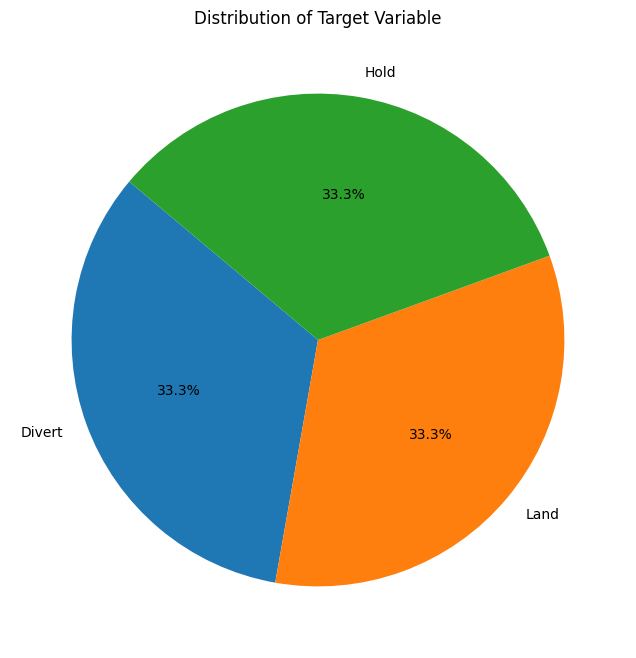

In [39]:
smote = SMOTE()

x_train_resampled, y_train_resampled = smote.fit_resample(x_train_processed, y_train)

target_counts = y_train_resampled.value_counts()
target_counts

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()

In [40]:
x_train_sample = x_train_resampled.iloc[:int(len(x_train_resampled) * 0.5)]
y_train_sample = y_train_resampled.iloc[:int(len(y_train_resampled) * 0.5)]

print(x_train_sample.shape, y_train_sample.shape)
x_train_sample

(223659, 28) (223659,)


,Current_Altitude_ft,Current_Speed_knots,Heading_degrees,Vertical_Speed_ft_per_min,Fuel_Remaining_kg,MST_minutes,Wind_Speed_knots,Wind_Direction_degrees,Visibility_meters,Precipitation_mm,...,Delay_Cost,Runway_Conditions encoded,Runway_Availability encoded,Time_of_Day encoded,Out_of_Gate_Time encoded,Aircraft_Type_Model encoded,Flight_Route_Complexity encoded,Political_Importance encoded,Diverted_Before encoded,Transit_Flight encoded
0,9840,222,334,935,5958.852340,2.040000,30.820000,240,5701,24.870000,...,1020.000000,0.320269,0.80064,0.399783,0.000691,0.199194,0.501703,0.97988,0.899194,0.150949
1,15626,443,321,1843,2608.019778,5.050000,20.060000,35,8615,8.190000,...,0.000000,0.398743,0.80064,0.399783,0.000691,0.199640,0.498297,0.97988,0.899194,0.849051
2,4103,333,70,-1333,3369.377727,6.600000,43.680000,224,1940,40.160000,...,3300.000000,0.320269,0.80064,0.600217,0.000737,0.201097,0.501703,0.97988,0.899194,0.849051
3,6928,548,10,-761,851.228962,8.120000,16.560000,360,9507,1.390000,...,4060.000000,0.398743,0.80064,0.399783,0.000709,0.199194,0.501703,0.97988,0.100806,0.849051
4,38075,340,315,675,2155.188868,9.940000,35.110000,153,3902,32.300000,...,4970.000000,0.320269,0.80064,0.600217,0.000817,0.199954,0.498297,0.97988,0.899194,0.849051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223654,4677,213,65,164,3955.855811,8.372376,23.822173,135,7868,5.510204,...,1255.856356,0.398743,0.80064,0.600217,0.000682,0.199604,0.500135,0.97988,0.899194,0.849051
223655,16973,116,291,-190,1283.453793,1.672005,21.506702,82,8217,6.616480,...,250.800808,0.398743,0.80064,0.600217,0.000638,0.199239,0.498639,0.97988,0.899194,0.849051
223656,25937,349,292,1033,5368.221205,4.395066,15.439110,129,9199,7.734569,...,659.259841,0.398743,0.80064,0.600217,0.000683,0.199276,0.498600,0.97988,0.899194,0.786939
223657,1405,404,66,-1698,3259.625727,7.846362,18.929722,46,9160,3.335713,...,1176.954226,0.398743,0.80064,0.600217,0.000690,0.199580,0.498297,0.97988,0.899194,0.849051


Solution: Specify the Correct average Parameter
You need to explicitly set the average parameter to handle multiclass classification. Use one of the following options:
Explanation of Different average Values:
'micro': Computes metrics globally by counting total true positives, false negatives, and false positives.
'macro': Computes metrics for each class separately and then takes the unweighted mean.
'weighted': Like 'macro', but weights each class by the number of samples in that class.
None: Returns scores for each class separately.
Which One Should You Use?
If class distribution is imbalanced, use 'weighted'.
If all classes are equally important, use 'macro'.

In [50]:
rf = RandomForestClassifier()

rf.fit(x_train_sample, y_train_sample)

# y_pred = rf.predict(x_test_processed)
# #
# accuracy = accuracy_score(y_pred, y_test)
# precision = precision_score(y_pred, y_test)
# recall = recall_score(y_pred, y_test)
# f1_score = f1_score(y_pred, y_test)

# print(accuracy, precision, recall, f1_score)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = rf.predict(x_test_processed)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# For multiclass, set average='macro', 'micro', or 'weighted'
precision = precision_score(y_test, y_pred, average='macro')  # or 'micro' or 'weighted'
recall = recall_score(y_test, y_pred, average='macro')        # or 'micro' or 'weighted'
f1 = f1_score(y_test, y_pred, average='macro')                # or 'micro' or 'weighted'

print(accuracy, precision, recall, f1)

#before priority  0.99332 0.9609473450606777 0.9777784724633354 0.9677703014506266
#after priority in consideration 0.9946 0.9677805145926263 0.9820047987203413 0.9738257550616721

0.9946 0.9677805145926263 0.9820047987203413 0.9738257550616721


In [43]:
y_test.shape

(75000,)

In [44]:

y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

,count
0,
Divert,63740
Land,7003
Hold,4257


priorityyy


In [46]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()

xgboost.fit(x_train_resampled, y_train_resampled)

y_pred = xgboost.predict(x_test_processed)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average = 'macro')
recall = recall_score(y_pred, y_test, average = 'macro')
f1score = f1_score(y_pred, y_test, average = 'macro')

print(accuracy, precision, recall, f1score)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Divert' 'Hold' 'Land']

In [ ]:
df1

,Flight_ID,Current_Altitude_ft,Current_Speed_knots,Heading_degrees,Vertical_Speed_ft_per_min,Fuel_Remaining_kg,MST_minutes,Wind_Speed_knots,Wind_Direction_degrees,Visibility_meters,...,Out_of_Gate_Time,Arrival_Time_Diff_minutes,Distance_to_Destination_nm,Aircraft_Type_Model,Flight_Route_Complexity,Political_Importance,Diverted_Before,Transit_Flight,ATC_Instruction,Delay_Cost
0,1,10780,581,201,-312,5897.408990,3.05,42.88,166,3369,...,01:08,20,2527.57,Airbus A320,Direct,Normal,No,No,Divert,1525.0
1,2,28106,485,265,-744,941.928396,7.67,27.99,0,6938,...,09:44,75,4922.62,Airbus A380,Direct,Normal,No,No,Divert,3835.0
2,3,4840,216,59,896,3122.051495,4.29,46.80,191,1215,...,10:42,79,3903.95,Boeing 777,Multiple Waypoints,Normal,No,No,Divert,2145.0
3,4,4036,120,279,-1197,4176.402884,3.50,26.68,62,5974,...,11:22,99,3528.81,Boeing 777,Multiple Waypoints,Normal,No,No,Divert,1750.0
4,5,27342,179,329,-1645,8067.841556,1.74,49.47,37,1165,...,02:49,90,1735.88,Embraer 190,Multiple Waypoints,Normal,No,No,Divert,870.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,23614,502,15,1589,6335.802751,9.80,21.44,77,7583,...,00:54,77,2409.02,Boeing 777,Multiple Waypoints,Normal,No,No,Land,1540.0
249996,249997,37376,402,248,1449,8565.353618,7.10,42.12,353,2876,...,16:08,87,1021.42,Airbus A380,Multiple Waypoints,Normal,No,No,Divert,3550.0
249997,249998,37066,245,144,583,7812.843640,7.82,48.64,71,1114,...,07:02,68,1450.88,Embraer 190,Direct,Normal,No,No,Divert,3910.0
249998,249999,31829,563,37,1396,8533.342178,7.40,31.06,169,5775,...,09:53,-18,1255.47,Airbus A380,Direct,Normal,No,No,Divert,3700.0


In [48]:
# Copy the dataset to preserve the original
df_encoded = df.copy()

# Label Encoding for Binary & Ordinal Features
binary_cols = ["Runway_Availability", "Diverted_Before", "Transit_Flight"]
ordinal_cols = ["Political_Importance"]  # Assuming levels: Low < Medium < High

label_encoder = LabelEncoder()
for col in binary_cols + ordinal_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# One-Hot Encoding for Non-Ordinal Categorical Features
df_encoded = pd.get_dummies(df_encoded,
                             columns=["Runway_Conditions", "Time_of_Day",
                                      "Aircraft_Type_Model", "Flight_Route_Complexity",
                                      "ATC_Instruction"],
                             drop_first=True)  # Drop first column to avoid redundancy

# Convert 'Out_of_Gate_Time' to numerical features (Hour & Minute)
df_encoded["Out_of_Gate_Hour"] = pd.to_datetime(df["Out_of_Gate_Time"], format="%H:%M").dt.hour
df_encoded["Out_of_Gate_Minute"] = pd.to_datetime(df["Out_of_Gate_Time"], format="%H:%M").dt.minute
df_encoded.drop(columns=["Out_of_Gate_Time"], inplace=True)  # Drop original time column

# Display transformed dataset
print(df_encoded.head())


   Flight_ID  Current_Altitude_ft  Current_Speed_knots  Heading_degrees  \
0          1                10780                  581              201   
1          2                28106                  485              265   
2          3                 4840                  216               59   
3          4                 4036                  120              279   
4          5                27342                  179              329   

   Vertical_Speed_ft_per_min  Fuel_Remaining_kg  MST_minutes  \
0                       -312        5897.408990         3.05   
1                       -744         941.928396         7.67   
2                        896        3122.051495         4.29   
3                      -1197        4176.402884         3.50   
4                      -1645        8067.841556         1.74   

   Wind_Speed_knots  Wind_Direction_degrees  Visibility_meters  ...  \
0             42.88                     166               3369  ...   
1             27.99   

In [49]:


# Define Weights (Adjustable)
weights = {
    "Fuel_Remaining_kg": -0.5,  # Negative weight (lower fuel = higher priority)
    "Political_Importance": 1.5,  # VIPs get high priority
    "Diverted_Before": 1.0,  # Already diverted flights get priority
    "Transit_Flight": 0.8  # Transit flights are given priority
}

# Compute Priority Score
df_encoded["Priority_Score"] = (
    weights["Fuel_Remaining_kg"] * df_encoded["Fuel_Remaining_kg"] +
    weights["Political_Importance"] * df_encoded["Political_Importance"] +
    weights["Diverted_Before"] * df_encoded["Diverted_Before"] +
    weights["Transit_Flight"] * df_encoded["Transit_Flight"]
)

# Sort by Priority (Descending)
df_sorted = df_encoded.sort_values(by="Priority_Score", ascending=False)

# Display Priority Ranking
print(df_sorted[["Flight_ID", "Fuel_Remaining_kg", "Political_Importance", "Diverted_Before", "Transit_Flight", "Priority_Score"]])


        Flight_ID  Fuel_Remaining_kg  Political_Importance  Diverted_Before  \
19491       19492         500.000000                     1                1   
85202       85203         500.000000                     1                1   
43964       43965         500.000000                     1                1   
123813     123814         500.000000                     1                1   
219922     219923         500.000000                     1                1   
...           ...                ...                   ...              ...   
51639       51640        9473.706990                     0                0   
215202     215203        9479.268283                     0                0   
158471     158472        9487.216707                     0                0   
72402       72403        9489.262766                     0                0   
239401     239402        9493.731160                     0                1   

        Transit_Flight  Priority_Score  
19491     

In [51]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 19491 to 239401
Data columns (total 37 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Flight_ID                                   250000 non-null  int64  
 1   Current_Altitude_ft                         250000 non-null  int64  
 2   Current_Speed_knots                         250000 non-null  int64  
 3   Heading_degrees                             250000 non-null  int64  
 4   Vertical_Speed_ft_per_min                   250000 non-null  int64  
 5   Fuel_Remaining_kg                           250000 non-null  float64
 6   MST_minutes                                 250000 non-null  float64
 7   Wind_Speed_knots                            250000 non-null  float64
 8   Wind_Direction_degrees                      250000 non-null  int64  
 9   Visibility_meters                           250000 non-null  int64  
 1

In [52]:


# Ensure Priority exists in the dataset
if "Priority" in df.columns:
    # 1️⃣ Check distribution of priority levels
    sns.histplot(df["Priority"], bins=10, kde=True)
    plt.title("Distribution of Landing Priority")
    plt.xlabel("Priority Score")
    plt.ylabel("Number of Flights")
    plt.show()

    # 2️⃣ Compare priority vs. fuel remaining
    sns.boxplot(x=pd.qcut(df["Priority"], 4, labels=["Low", "Medium", "High", "Critical"]), y=df["Fuel_Remaining_kg"])
    plt.title("Fuel Remaining vs. Priority Level")
    plt.xlabel("Priority Category")
    plt.ylabel("Fuel Remaining (kg)")
    plt.show()

    # 3️⃣ Analyze mean priority by ATC instruction
    print(df.groupby("ATC_Instruction")["Priority"].mean().sort_values())

    # 4️⃣ Correlation analysis
    priority_corr = df[["Priority", "Fuel_Remaining_kg", "Aircraft_in_Holding", "Arrival_Time_Diff_minutes"]].corr()
    sns.heatmap(priority_corr, annot=True, cmap="coolwarm")
    plt.title("Priority Correlation with Other Factors")
    plt.show()

    # 5️⃣ Top 10 highest priority flights
    print("\n🚨 Top 10 Flights with Highest Priority:")
    print(df[["Flight_ID", "Priority", "Fuel_Remaining_kg", "Political_Importance", "Diverted_Before", "Transit_Flight"]]
          .sort_values(by="Priority", ascending=False).head(10))

else:
    print("Priority column not found in dataset. Ensure it was added during merging.")


Priority column not found in dataset. Ensure it was added during merging.


In [ ]:
df1

NameError: name 'df1' is not defined

Delay cost function

In [54]:
import numpy as np
import pandas as pd

# Sample dataset (Flight_ID, Delay in minutes, Passenger Count, Aircraft Type, Airport Type, Time of Day, Fuel Cost)
np.random.seed(42)
n_flights = 1000

dff = pd.DataFrame({
    "Flight_ID": np.arange(1, n_flights + 1),
    "Delay_Minutes": np.random.randint(0, 180, size=n_flights),  # Delay range: 0-180 mins
    "Passenger_Count": np.random.randint(50, 300, size=n_flights),
    "Aircraft_Type": np.random.choice(["Boeing 737", "Airbus A320", "Boeing 777"], size=n_flights),
    "Airport_Type": np.random.choice(["Hub", "Non-Hub"], size=n_flights, p=[0.6, 0.4]),
    "Time_of_Day": np.random.choice(["Morning", "Afternoon", "Evening", "Night"], size=n_flights),
    "Fuel_Cost": np.random.uniform(1000, 5000, size=n_flights)  # Random fuel costs
})

# Define Delay Cost Functions
def passenger_delay(delay, passengers):
    """Cost = Delay x Number of Passengers"""
    return delay * passengers

def step_function(delay):
    """Cost increases in steps at delay thresholds (15 min, 60 min, 120 min)"""
    if delay < 15:
        return 100
    elif delay < 60:
        return 500
    elif delay < 120:
        return 2000
    else:
        return 5000

def monetary_delay(delay, fuel_cost):
    """Cost = Delay x Fuel Cost Factor"""
    return delay * (fuel_cost / 1000)  # Normalize fuel cost impact

# Apply Cost Functions to Data
dff["Cost_Passenger_Delay"] = dff.apply(lambda x: passenger_delay(x["Delay_Minutes"], x["Passenger_Count"]), axis=1)
dff["Cost_Step_Function"] = dff["Delay_Minutes"].apply(step_function)
dff["Cost_Monetary_Delay"] = dff.apply(lambda x: monetary_delay(x["Delay_Minutes"], x["Fuel_Cost"]), axis=1)

# Compute Evaluation Metrics
def fsfs_ratio(airline_cost, fsfs_cost):
    """FSFS Ratio = Airline Cost / First-Scheduled-First-Served Cost"""
    return airline_cost / fsfs_cost if fsfs_cost > 0 else 1

def improvement_frequency(airline_cost, fsfs_cost):
    """Improvement Frequency: Fraction of cases where airline cost is lower than FSFS cost"""
    return np.mean(airline_cost < fsfs_cost)

def minimum_ratio(airline_cost, min_cost):
    """Minimum Ratio = Airline Cost / Minimum Possible Cost"""
    return airline_cost / min_cost if min_cost > 0 else 1

# Assume FSFS Cost is a baseline cost (e.g., all flights delayed equally)
fsfs_baseline = dff["Delay_Minutes"].mean() * dff["Passenger_Count"].mean()

dff["FSFS_Ratio"] = dff.apply(lambda x: fsfs_ratio(x["Cost_Passenger_Delay"], fsfs_baseline), axis=1)
dff["Minimum_Ratio"] = dff.apply(lambda x: minimum_ratio(x["Cost_Passenger_Delay"], x["Cost_Step_Function"]), axis=1)

# Calculate Improvement Frequency for different models
imp_freq_passenger = improvement_frequency(dff["Cost_Passenger_Delay"], fsfs_baseline)
imp_freq_step = improvement_frequency(dff["Cost_Step_Function"], fsfs_baseline)
imp_freq_monetary = improvement_frequency(dff["Cost_Monetary_Delay"], fsfs_baseline)

# Display Results
print("\n--- Airline Delay Cost Analysis ---")
print(f"Improvement Frequency (Passenger Delay Model): {imp_freq_passenger:.3f}")
print(f"Improvement Frequency (Step Function Model): {imp_freq_step:.3f}")
print(f"Improvement Frequency (Monetary Delay Model): {imp_freq_monetary:.3f}")
print("\nSample Data:")
print(dff.head())




--- Airline Delay Cost Analysis ---
Improvement Frequency (Passenger Delay Model): 0.590
Improvement Frequency (Step Function Model): 1.000
Improvement Frequency (Monetary Delay Model): 1.000

Sample Data:
   Flight_ID  Delay_Minutes  Passenger_Count Aircraft_Type Airport_Type  \
0          1            102              276   Airbus A320      Non-Hub   
1          2            179               84    Boeing 777      Non-Hub   
2          3             92               50   Airbus A320      Non-Hub   
3          4             14               89    Boeing 737      Non-Hub   
4          5            106              113    Boeing 777      Non-Hub   

  Time_of_Day    Fuel_Cost  Cost_Passenger_Delay  Cost_Step_Function  \
0     Morning  3697.035368                 28152                2000   
1   Afternoon  1022.874325                 15036                5000   
2       Night  2863.303013                  4600                2000   
3     Evening  3284.649194                  1246      

In [ ]:
target = df1['']
features = df1.drop(columns = {'ATC_Instruction', 'Flight_ID'})
target




rf = RandomForestClassifier()



rf.fit(x_train_sample, y_train_sample)

# y_pred = rf.predict(x_test_processed)
# #
# accuracy = accuracy_score(y_pred, y_test)
# precision = precision_score(y_pred, y_test)
# recall = recall_score(y_pred, y_test)
# f1_score = f1_score(y_pred, y_test)

# print(accuracy, precision, recall, f1_score)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = rf.predict(x_test_processed)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# For multiclass, set average='macro', 'micro', or 'weighted'
precision = precision_score(y_test, y_pred, average='macro')  # or 'micro' or 'weighted'
recall = recall_score(y_test, y_pred, average='macro')        # or 'micro' or 'weighted'
f1 = f1_score(y_test, y_pred, average='macro')                # or 'micro' or 'weighted'

print(accuracy, precision, recall, f1)

#before priority  0.99332 0.9609473450606777 0.9777784724633354 0.9677703014506266
#after priority in consideration 0.9946 0.9677805145926263 0.9820047987203413 0.9738257550616721

In [55]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# 🔹 Step 1: Load Sample Flight Delay Dataset
np.random.seed(42)
n_flights = 5000  # Number of flights

df = pd.DataFrame({
    "Altitude_ft": np.random.randint(0, 40000, n_flights),
    "Speed_knots": np.random.randint(100, 600, n_flights),
    "Fuel_Remaining_kg": np.random.randint(500, 9000, n_flights),
    "Wind_Speed_knots": np.random.randint(0, 50, n_flights),
    "Runway_Availability": np.random.choice(["Open", "Closed"], n_flights, p=[0.8, 0.2]),
    "Aircraft_in_Holding": np.random.randint(0, 20, n_flights),
    "Visibility_meters": np.random.randint(500, 10000, n_flights),
    "Delay_Minutes": np.random.randint(0, 180, n_flights),  # Delay range: 0-180 mins
    "Passenger_Count": np.random.randint(50, 300, n_flights),
    "ATC_Instruction": np.random.choice(["Land", "Hold", "Divert"], n_flights, p=[0.6, 0.3, 0.1])  # Target variable
})

# 🔹 Step 2: Convert Categorical Data to Numeric
label_encoder = LabelEncoder()
df["Runway_Availability"] = label_encoder.fit_transform(df["Runway_Availability"])  # Convert Open/Closed to 1/0
df["ATC_Instruction"] = label_encoder.fit_transform(df["ATC_Instruction"])  # Convert (Land, Hold, Divert) to (0,1,2)

# 🔹 Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["ATC_Instruction"])  # Features
y = df["ATC_Instruction"]  # Target (Land, Hold, Divert)

# 🔹 Step 4: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 5: Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# 🔹 Step 6: Make Predictions
y_pred = xgb_model.predict(X_test)

# 🔹 Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2f}\n")
print("📌 Classification Report:\n", classification_report(y_test, y_pred))




✅ Model Accuracy: 0.59

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.02        98
           1       0.34      0.07      0.12       298
           2       0.61      0.94      0.74       604

    accuracy                           0.59      1000
   macro avg       0.48      0.34      0.29      1000
weighted avg       0.52      0.59      0.48      1000



Fitting 3 folds for each of 27 candidates, totalling 81 fits

✅ Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:17:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Model Accuracy: 0.59

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.23      0.01      0.02       297
           2       0.59      0.99      0.74       593

    accuracy                           0.59      1000
   macro avg       0.27      0.33      0.25      1000
weighted avg       0.42      0.59      0.44      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


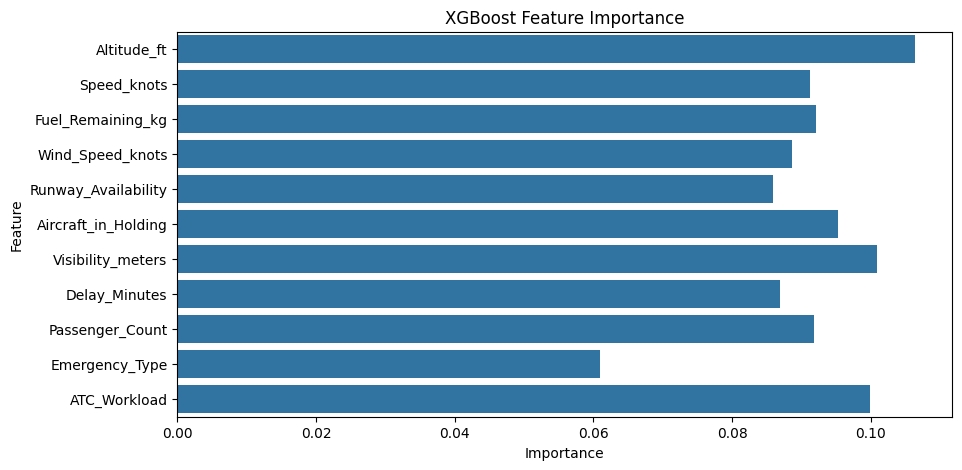

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# 📌 Step 1: Generate a Sample Flight Delay Dataset
np.random.seed(42)
n_flights = 5000  # Number of flights

df = pd.DataFrame({
    "Altitude_ft": np.random.randint(0, 40000, n_flights),
    "Speed_knots": np.random.randint(100, 600, n_flights),
    "Fuel_Remaining_kg": np.random.randint(500, 9000, n_flights),
    "Wind_Speed_knots": np.random.randint(0, 50, n_flights),
    "Runway_Availability": np.random.choice(["Open", "Closed"], n_flights, p=[0.8, 0.2]),
    "Aircraft_in_Holding": np.random.randint(0, 20, n_flights),
    "Visibility_meters": np.random.randint(500, 10000, n_flights),
    "Delay_Minutes": np.random.randint(0, 180, n_flights),  # Delay range: 0-180 mins
    "Passenger_Count": np.random.randint(50, 300, n_flights),
    "Emergency_Type": np.random.choice([0, 1, 2], n_flights, p=[0.7, 0.2, 0.1]),  # 0=Normal, 1=Minor, 2=Major
    "ATC_Workload": np.random.randint(5, 20, n_flights),  # ATC Workload (Flights per hour)
    "ATC_Instruction": np.random.choice(["Land", "Hold", "Divert"], n_flights, p=[0.6, 0.3, 0.1])  # Target variable
})

# 📌 Step 2: Convert Categorical Data to Numeric
label_encoder = LabelEncoder()
df["Runway_Availability"] = label_encoder.fit_transform(df["Runway_Availability"])  # Open/Closed → 1/0
df["ATC_Instruction"] = label_encoder.fit_transform(df["ATC_Instruction"])  # Land, Hold, Divert → 0,1,2

# 📌 Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["ATC_Instruction"])  # Features
y = df["ATC_Instruction"]  # Target (Land, Hold, Divert)

# 📌 Step 4: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 5: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [5, 7, 10],  # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the Best Parameters
best_params = grid_search.best_params_
print("\n✅ Best Hyperparameters:", best_params)

# 📌 Step 6: Train XGBoost Model with Optimized Hyperparameters & Class Weights
xgb_model = XGBClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    scale_pos_weight={0: 1, 1: 2, 2: 5},  # Handle class imbalance
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 📌 Step 7: Make Predictions
y_pred = xgb_model.predict(X_test)

# 📌 Step 8: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2f}")
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Step 9: Visualizing Feature Importance
feature_importances = xgb_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.show()
